# Cereales


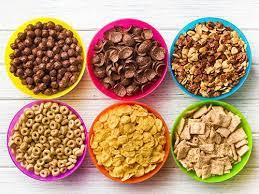

¿Te gusta comer cerales? ¿Crees que es un alimento sano?

Esta base de datos contiene información de contenido nutricional de diferentes marcas de cereales, junto con un rankeo realizado por los consumidores.

En este deseafio le pedimos que construya un modelo predictivo que sea capaz de reponder:
1. ¿ Cualés son las variables más relevantes a la hora de rankear un cereal según los consumidores?
2. Considerando que existen 3 categorías (malo, decente, bueno), ¿en qué categoría caen las marcas "Quaker oat Squares", "Trix", "Maypo"

In [ ]:
# Download Cereal dataset
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://drive.google.com/uc?export=download&id=1Isw_QGasXKq7gleMQf2rd-fMih2qqwSR' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1Isw_QGasXKq7gleMQf2rd-fMih2qqwSR" -O cereal.csv && rm -rf /tmp/cookies.txt

--2023-02-16 10:51:27--  https://docs.google.com/uc?export=download&confirm=&id=1Isw_QGasXKq7gleMQf2rd-fMih2qqwSR
Resolving docs.google.com (docs.google.com)... 142.251.163.113, 142.251.163.102, 142.251.163.101, ...
Connecting to docs.google.com (docs.google.com)|142.251.163.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-00-98-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/u54a7su44t01lheos1rt5ovuph9bejqq/1676544675000/04187606118952679260/*/1Isw_QGasXKq7gleMQf2rd-fMih2qqwSR?e=download&uuid=dea32eed-c1d2-48d4-afd0-3bdf71a60e25 [following]
--2023-02-16 10:51:27--  https://doc-00-98-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/u54a7su44t01lheos1rt5ovuph9bejqq/1676544675000/04187606118952679260/*/1Isw_QGasXKq7gleMQf2rd-fMih2qqwSR?e=download&uuid=dea32eed-c1d2-48d4-afd0-3bdf71a60e25
Resolving doc-00-98-docs.googleusercontent.com (doc-00-98-docs.googleusercontent.com)... 142.251.163.1

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
import os

Inciso 1

In [ ]:
data = pd.read_csv("cereal.csv")
data.head(5)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [ ]:
data.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [ ]:
data.shape

(77, 16)

In [ ]:
data1 = data[(data.carbo >= 0) & (data.sugars >= 0) & (data.potass >= 0)]
data1.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,107.027027,2.513514,1.000000,162.364865,2.175676,14.729730,7.108108,98.513514,29.054054,2.216216,1.030811,0.821622,42.371787
std,19.843893,1.075802,1.006826,82.769787,2.423391,3.891675,4.359111,70.878681,22.294352,0.832067,0.153416,0.235715,14.033712
min,50.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,15.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,135.000000,0.250000,12.000000,3.000000,41.250000,25.000000,1.250000,1.000000,0.670000,32.449210
50%,110.000000,2.500000,1.000000,180.000000,2.000000,14.500000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.253086
75%,110.000000,3.000000,1.000000,217.500000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.520611
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [ ]:
data1.shape

(74, 16)

In [ ]:
mfrv, mfrind = pd.factorize(data1['mfr'])
data1['mfr'] = mfrv
typev, typeind = pd.factorize(data1['type'])
data1['type'] = typev

<ipython-input-8-efa31578fa42>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['mfr'] = mfrv
<ipython-input-8-efa31578fa42>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['type'] = typev


In [ ]:
X = data1.drop(columns = ['name', 'rating'])
y = data1['rating']

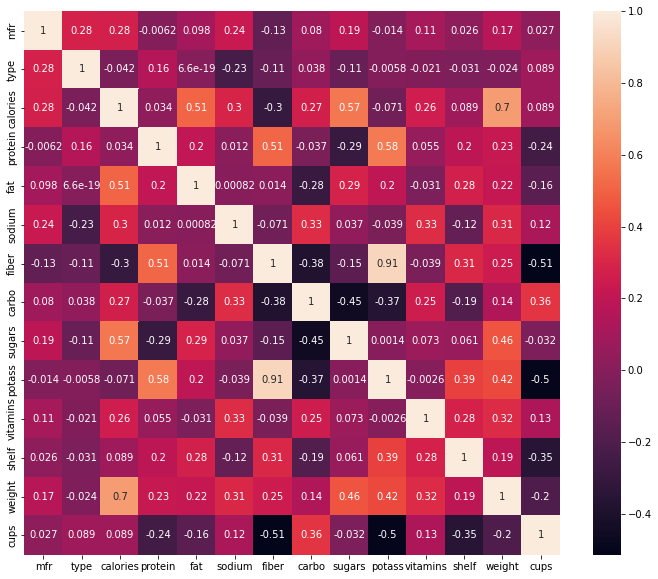

In [ ]:
corr_matrix = X.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'alpha':[0, 1e-5, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20,100, 200, 300, 400, 500]}
Ridge_reg = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error',cv=3)

In [ ]:
Ridge_reg.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [0, 1e-05, 0.0001, 0.001, 0.01, 1, 5, 10, 20,
                                   100, 200, 300, 400, 500]},
             scoring='neg_mean_squared_error')

In [ ]:
print(Ridge_reg.best_params_)

{'alpha': 0}


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg_grid = LinearRegression()

In [ ]:
reg_grid.fit(X_train,y_train)

LinearRegression()

In [ ]:
reg_grid.score(X_train,y_train)

0.9999999999999997

In [ ]:
reg_grid.score(X_test,y_test)

0.9999999999999994

Text(0.5, 0, 'Coeficientes del modelo de regresión')

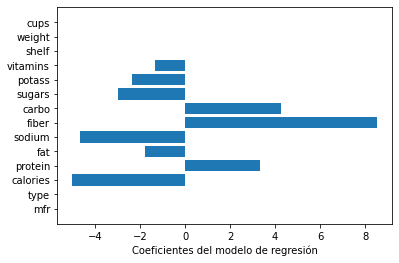

In [ ]:
plt.barh(X.columns, reg_grid.coef_)
plt.xlabel("Coeficientes del modelo de regresión")

Text(0.5, 0, 'Valor absoluto de los coeficientes del modelo de regresión')

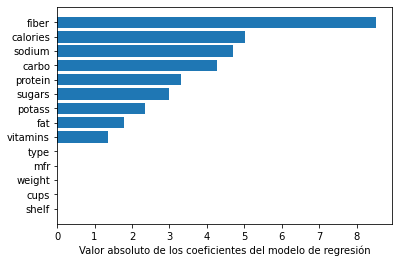

In [ ]:
sorted_idx = abs(reg_grid.coef_).argsort()
plt.barh(X.columns[sorted_idx], abs(reg_grid.coef_)[sorted_idx])
plt.xlabel("Valor absoluto de los coeficientes del modelo de regresión")

Inciso 2

In [ ]:
# X = data1.drop(columns = ['name', 'rating'])
X = data1.drop(columns = ['name', 'rating', 'type', 'mfr','cups','weight','shelf'])

In [ ]:
y.describe()

count    74.000000
mean     42.371787
std      14.033712
min      18.042851
25%      32.449210
50%      40.253086
75%      50.520611
max      93.704912
Name: rating, dtype: float64

Text(0.5, 0, 'Histograma de los ratings')

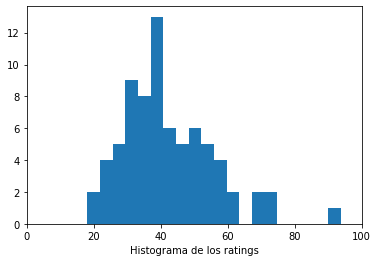

In [ ]:
plt.xlim(0, 100)
a = plt.hist(y,20)
plt.xlabel("Histograma de los ratings")

In [ ]:
p2_5 = np.percentile(y, 2.5)
p97_5 = np.percentile(y, 97.5)

In [ ]:
X1 = X[(y >= p2_5) & (y <= p97_5)]
y1 = y[(y >= p2_5) & (y <= p97_5)]
nombres = data1.name.copy()
nombres = nombres[(y >= p2_5) & (y <= p97_5)]

In [ ]:
y1.describe()

count    70.000000
mean     41.849542
std      11.790444
min      21.871292
25%      33.376490
50%      40.253086
75%      49.718552
max      72.801787
Name: rating, dtype: float64

Text(0.5, 0, 'Histograma de los ratings acortado')

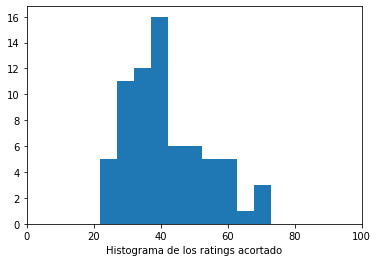

In [ ]:
plt.xlim(0, 100)
a = plt.hist(y1,10)
plt.xlabel("Histograma de los ratings acortado")

In [ ]:
y2 = pd.cut(y1, 3, retbins=True)[0]

In [ ]:
y2

0     (55.825, 72.802]
1      (21.82, 38.848]
2     (55.825, 72.802]
5      (21.82, 38.848]
6      (21.82, 38.848]
            ...       
72    (38.848, 55.825]
73     (21.82, 38.848]
74    (38.848, 55.825]
75    (38.848, 55.825]
76     (21.82, 38.848]
Name: rating, Length: 70, dtype: category
Categories (3, interval[float64, right]): [(21.82, 38.848] < (38.848, 55.825] < (55.825, 72.802]]

In [ ]:
y2.value_counts()

(38.848, 55.825]    31
(21.82, 38.848]     30
(55.825, 72.802]     9
Name: rating, dtype: int64

In [ ]:
Y1 = y2.cat.codes

In [ ]:
ranged_label_dict = dict(zip(y2.cat.codes.sort_values().unique(), y2.cat.categories))
ranged_label_dict

{0: Interval(21.82, 38.848, closed='right'),
 1: Interval(38.848, 55.825, closed='right'),
 2: Interval(55.825, 72.802, closed='right')}

In [ ]:
Y1.head(7)

0    2
1    0
2    2
5    0
6    0
7    0
8    1
dtype: int8

In [ ]:
X2 = X1[(nombres != 'Maypo') & (nombres != 'Quaker Oat Squares') & (nombres != 'Trix')]
Y2 = Y1[(nombres != 'Maypo') & (nombres != 'Quaker Oat Squares') & (nombres != 'Trix')]

In [ ]:
X2.shape

(67, 9)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X2, Y2, test_size=0.25, stratify=Y2, random_state=42)

In [ ]:
sc = StandardScaler()

In [ ]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X1 = sc.transform(X1)

In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 0.5, 1, 10, 100], 'gamma': [1,0.1,0.01,0.001], 'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}
clfSVC = SVC(random_state=42)

In [ ]:
grid = GridSearchCV(estimator = clfSVC, param_grid = param_grid, refit=True, verbose=1, cv = 3)

In [ ]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 80 candidates, totalling 240 fits


GridSearchCV(cv=3, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 0.5, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             verbose=1)

In [ ]:
print(grid.best_params_)

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


In [ ]:
clfSVC_grid = SVC(C=100, gamma=0.001, kernel='rbf', random_state=42)

In [ ]:
knn = KNeighborsClassifier()
k_range = list(range(1, 21))
param_grid2 = dict(n_neighbors = k_range)

In [ ]:
grid2 = GridSearchCV(estimator = knn, param_grid = param_grid2, cv=3, refit=True, verbose=1)

In [ ]:
grid2.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20]},
             verbose=1)

In [ ]:
print(grid2.best_params_)

{'n_neighbors': 3}


In [ ]:
knn_grid = KNeighborsClassifier(n_neighbors=3)

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cross_validation_result1 = cross_val_score(clfSVC_grid, X_train,y_train, cv = 3, scoring = 'accuracy')
cross_validation_result2 = cross_val_score(knn_grid, X_train, y_train, cv = 3, scoring = 'accuracy')
print(cross_validation_result1.mean(), cross_validation_result2.mean())

0.8811274509803922 0.8811274509803922


In [ ]:
cross_validation_result1

array([0.76470588, 0.94117647, 0.9375    ])

In [ ]:
cross_validation_result2

array([0.82352941, 0.88235294, 0.9375    ])

In [ ]:
clfSVC_grid.fit(X_train,y_train)

SVC(C=100, gamma=0.001, random_state=42)

In [ ]:
prediccion = clfSVC_grid.predict(X1)

In [ ]:
clfSVC_grid.score(X_train,y_train)

0.94

In [ ]:
clfSVC_grid.score(X_test,y_test)

0.9411764705882353

In [ ]:
print('original asignado:', np.array(Y1[(nombres == 'Maypo')])[0],'   predicción:', prediccion[(nombres == 'Maypo')][0])
print('original asignado:', np.array(Y1[(nombres == 'Trix')])[0],'   predicción:', prediccion[(nombres == 'Trix')][0])
print('original asignado:', np.array(Y1[(nombres == 'Quaker Oat Squares')])[0],'   predicción:', prediccion[(nombres == 'Quaker Oat Squares')][0])

original asignado: 1    predicción: 1
original asignado: 0    predicción: 0
original asignado: 1    predicción: 1


In [ ]:
categoria = { 0: 'malo', 1: 'decente', 2 : 'bueno'}

In [ ]:
print('Maypo es un producto', categoria[prediccion[(nombres == 'Maypo')][0]])
print('Trix es un producto', categoria[prediccion[(nombres == 'Trix')][0]])
print('Quaker Oat Squares', categoria[prediccion[(nombres == 'Quaker Oat Squares')][0]])

Maypo es un producto decente
Trix es un producto malo
Quaker Oat Squares decente


In [ ]:
data1.rating[data1.name=='Maypo']

43    54.850917
Name: rating, dtype: float64

In [ ]:
data1.rating[data1.name=='Trix']

73    27.753301
Name: rating, dtype: float64

In [ ]:
data1.rating[data1.name=='Quaker Oat Squares']

56    49.511874
Name: rating, dtype: float64